# A Demo for Symbolic Solving

## Import Libs

In [1]:
import os
import io
import sys
import json
import re
import numpy as np
from predicate import Predicate
from problem import Problem
from solver import Solver

## Load Annotation File

In [2]:
annotations = json.load(open('../datasets/geometry3k/geometry3k_test.json'))

## Validate the Problem

In [3]:
problem_id = '2404'
problem_data = annotations[problem_id]

# Choose the logic form to use
# Here we use the logic form annotated by human experts
problem_data['logic_forms'] = problem_data['logic_forms_annotated']

# Get the keyword arguments for the Problem class
kwargs_keys = ['logic_forms', 'point_instances', 'line_instances', 'circle_instances', 'point_positions']
problem_data = {k: problem_data[k] for k in kwargs_keys}
problem = Problem(**problem_data)
problem.goal # Display the goal of the problem

Predicate[MeasureOf(Angle(C, A, M))]

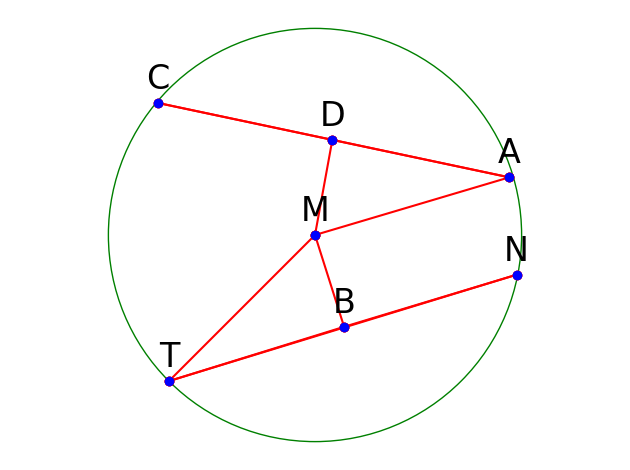

In [4]:
# We can visualize the problem diagram to check the correctness of the input
problem.topological_graph.plot()

## Solve the Problem

In [5]:
# Initialize the solver
solver = Solver(
    definitions_file_path="definitions.txt",
    theorems_file_path="theorems.txt",
    problem_data=problem_data,
    max_initial_iteration=1
)

In [6]:
# Solve the problem with 2 iterations.
sol = solver.solve(max_depth=2, max_deduction_iteration=1, max_algebraic_reasoning_iteration=1)
if sol:
    print("Solution found")
    print("Solution:", sol)
else:
    print("No solution found")

Solution found
Solution: Equals(0.4886921906, MeasureOf(Angle(C, A, M)))


In [7]:
# A solution should be found after running the above code.
# Get the corresponding node in the proof graph.
sol_node = solver.proof_graph.find_node_by_predicate(sol)
# Find its minimal proof
minimal_proof = solver.proof_graph.find_minimal_subgraph_for_goal(sol_node)

In [8]:
# Minimal proof is a list of edges, we convert it to a sequence of natural language statements
from proof_graph_format import proof_graph_to_natural_language, proof_graph_to_compact_natual_language

proof_in_nl = proof_graph_to_natural_language(minimal_proof, goal_node=sol_node, prune=True) # Prune=True removes redundant conclusions
print(proof_in_nl) # Uncomment to see the proof in natural language


# A more compact version of the proof is also available
proof_compact = proof_graph_to_compact_natual_language(minimal_proof, goal_node=sol_node, prune=True)
# print(proof_compact) # Uncomment to see the proof in compact natural language

# A latex format version to be used in the paper is also available
proof_compact_latex = proof_graph_to_compact_natual_language(minimal_proof, goal_node=sol_node, prune=True, latex=True)
# print(proof_compact_latex) # Uncomment to see the result in latex format

Step 1:
Theorem: Known facts
Premises : start
Conclusions: ∠MNT, 3.14 = pi, ∠CAM, B on NT, AD ⊥ DM, N on ⊙(M, radius_0_0), C on ⊙(M, radius_0_0), pi * (28 / 180) = ∠BTM, BM ⊥ BN, BM = DM, CD ⊥ DM, ⊙(M, radius_0_0), D on AC

Step 2:
Theorem: Same Angle
Premises : B on NT, ∠MNT
Conclusions: ∠MNB = ∠MNT

Step 3:
Theorem: Point On Circle Def
Premises : N on ⊙(M, radius_0_0)
Conclusions: radius_0_0 = MN

Step 4:
Theorem: Point On Circle Def
Premises : C on ⊙(M, radius_0_0)
Conclusions: radius_0_0 = CM

Step 5:
Theorem: Solve Linear Equation System
Premises : pi * (28 / 180) = ∠BTM, 3.14 = pi
Conclusions: 0.49 = ∠BTM

Step 6:
Theorem: Perpendicular to Right Angle
Premises : BM ⊥ BN
Conclusions: pi / 2 = ∠NBM

Step 7:
Theorem: Perpendicular to Right Angle
Premises : CD ⊥ DM
Conclusions: pi / 2 = ∠CDM

Step 8:
Theorem: Circle Vertical Theorem
Premises : ⊙(M, radius_0_0), B on NT, BM ⊥ BN
Conclusions: △BMN ≅ △BMT

Step 9:
Theorem: Same Angle
Premises : ∠CAM, D on AC
Conclusions: ∠CAM = ∠DAM

St

If you want to visualize the proof graph, please make sure you have [Graphviz](https://www.graphviz.org/) installed.

In [ ]:
from proof_graph_visualization import plot_proof_graph
# Export the proof graph to a file and view it

plot_proof_graph(
    minimal_proof,
    goal_node=sol_node, # The solution node
    prune=True, # Remove redundant conclusions
    view=True, # View the proof graph once generated
    output_file='./proof_graphs/proof_graph.png', # Path to save the proof graph
    dpi=300
)